In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Semana 2. Clase 3: Introducción señales en tiempo discreto y sistemas</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

## Indice 
+ [Señal](#id1)
    - [Representación digital del sonido](#id11)
    - [Señal exponencial complexa discreta](#id12)
    - [Indexando vectores en Python.](#id13)
    - [Arreglos 2D en Python](#id14)
    - [Usando índices para asignar valores a filas y columnas](#id15)

## 1. Señal<a name='id1'></a>.

> + Una **señal** contiene información. Esa información puede estar relacionada con el comportamiento de un **sistema**. Eso nos permitiría a través de la señal poder **analizar** (comprender) un sistema.    
> + Además, se puede **sintetizar** (producir) una señal con el propósito de **comunicar** información entre humanos y máquinas.
> + La información que contiene una señal se puede representar de muchas formas, por ejemplo, como una forma de onda temporal, a través de un espectro, o de un espectrograma, y muhcas otras más.
> + Lo increíblemente interesante es que esa información está **organizada** en ciertos patrones que varían ya sea en tiempo, en frecuencia (audio), o en el espacio (imagen).



### 1.1 Representación digital del sonido<a name='id11'></a>.

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="Representación digital del sonido"><img src="RepresentacionDigitalSonido.png" width="600" height="600" alt="Tiny"></a>
    <strong>Figure 1. Una representación idealizada digital de sonido. Ref: <a href="https://processing.org/tutorials/sound/">https://processing.org/tutorials/sound/</a><br></strong>


> * Estructura de un archivo **WAV**.
    + El formato de archivo WAV es derivado de la especificación: Resource Interchange File Format (.riff) de Microsoft para el almacenamiento de archivos multimedia.
    + Este formato es uno de los más utilizados para almacenar muestras de sonidos.
    + Se almacenan las muestras una tras otra.
    + Un archivo WAV puede pensarse como una matriz de valores de punto flotante entre -1.0 y +1.0. 
    + Cada número representa el valor de la función de sonido en un instante de tiempo de muestreo. En otras palabras, los números son las muestras de una señal de audio.

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="Representación digital del sonido"><img src="WAVFORMAT.png" width="400" height="400" alt="Tiny"></a>
    <strong>Figure 2. Formato clásico de un archivo wav. Ref: <a href="http://soundfile.sapp.org/doc/WaveFormat/">http://soundfile.sapp.org/doc/WaveFormat/</a><br></strong>

### 1.2 Señal exponencial complexa discreta<a name='id12'></a>.

La señal exponencial compleja discreta se define por:

\begin{equation}
x[n] = e^{(\Sigma + j \Omega) \, n} = z^n
\end{equation}

donde $z = e^{\Sigma + j \Omega}$ representa la frecuencia compleja $z \in \mathbb{C}$ con $\Sigma, \Omega \in \mathbb{R}$. La señal exponencial compleja discreta puede ser relacionada a la señal exponencial compleja continua $x(t) = e^{(\sigma + j \omega) t}$ a través del sampleo:

\begin{equation}
x[n] = x(nT) = e^{(\sigma + j \omega) n T} = e^{( \sigma T + j \omega T ) n}
\end{equation}

Si comparamos las dos definiciones, vemos que la señal discreta muestra que $\Sigma = \sigma T$ and $\Omega = \omega T$. Debido a esta relación, la última se llama **frecuencia normalizada** $\Omega$ (también llamada, frecuencia digital). Sus unidades son $rad/muestra$.

Usando [fórmula de Euler](https://en.wikipedia.org/wiki/Euler's_formula), la definición de la señal exponencial compleja discreta puede ser re-escrita como:

\begin{equation}
x[n] = e^{\Sigma n} \cos[\Omega n] + j e^{\Sigma n} \sin[\Omega n]
\end{equation}

Las partes real e imaginaria de la señal exponencial están dada por una senoidal o cosenoidal discreta ponderada, con frecuencia normalizada $\Omega$. La frecuencia normalizada $\Omega$ es un poquito ambigüa debido a la periodicidad de la función coseno o seno para $n$ discreto. Por ejemplo,

\begin{equation}
\cos[\Omega n] = \cos[(\Omega + N \cdot 2 \pi) \cdot n]
\end{equation}

con $N \in \mathbb{Z}$. Se puede concluir que la frecuencia normalizada $\Omega$ es única para $-\pi < \Omega < \pi$ (también podría haberse elegido el intervalo $0 < \Omega < 2\pi$. Pero, lo usual es $-\pi < \Omega < \pi$). En otras palabras, $\Omega$ es períodica de período $2\pi$. Se puede interpretar como si el eje de frecuencia (en tiempo continuo) fuera "warpeado" "doblado", alrededor de un círculo 

Esto también es evidente cuando se considera el sampleo de una señal exponencial continua, como se muestra arriba.

Para una frecuencia de muestreo crítica, es decir, $\omega_\text{s} = 2 \cdot \omega$. Si usamos: $T = \frac{2 \pi}{\omega_\text{s}}$, obtenemos: $\Omega = \omega T = \pi$. Se puede concluir que la frecuencia normalizada $\Omega = \pm \pi$ representa la más alta y más baja frecuencia normalizada que una señal sampleada puede representar.

La función exponencial compleja es solamente periódica con respecto al índice $n$, si:

\begin{equation}
x[n] = x[n + N \cdot N_\text{p}]
\end{equation}

para $N \in \mathbb{Z}$ y $N_\text{p} \in \mathbb{N}$. La periodicidad de la función exponencial compleja está dada por:

\begin{equation}
N_\text{p} = \frac{2 \pi}{\Omega}
\end{equation}

Se sigue que del requerimiento $N_\text{p} \in \mathbb{N}$ para una secuencia periódica, que no todas las frecuencias normalizadas $\Omega$ resultan en una señal exponencial compleja discreta. Solamente $\Omega = \frac{2 \pi}{N_\text{p}}$ con $N_\text{p} \in \mathbb{N}$ es periódica con período $N_\text{p}$. Samplear una una señal exponencial compleja continua puede resultar en una señal exponencial compleja discreta aperiódica. La señal exponencial compleja discreta s epuede expresar en términos de su magnitud y su fase:

\begin{equation}
x[n] = z^n = |z|^n \cdot e^{j \varphi(z) n}
\end{equation}

donde por comparación con su definición $|z| = |e^\Sigma|$ and $\varphi(z) = \Omega$. Est nos permite interpretar la frecuencia compleja $z$. Su fase $\varphi(z)$ es igual a la frecuencia normalizada $\Omega$ de su parte armónica $e^{j \Omega n}$. esta es ponderada por la magnitud $|z|^n$. Con índice creciente $n >0$, la magnitud de la señal compleja es:

* exponencialmente decreciente para: $|z| < 1$ ($\Sigma < 0$)
* constante uno para: $|z| = 1$ ($\Sigma = 0$)
* exponencialmente creciente para: $|z| > 1$ ($\Sigma > 0$).

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="Plano z."><img src="zplane.png" width="600" height="600" alt="Tiny"></a>
    <strong>Figure 3. Frecuencia normalizada $\Omega$ en el plano z.

### 1.3 Indexando vectores (1D) en Python<a name='id13'></a>.


> + En Python, una **lista** representa un concepto matemático súper importante: representa una secuencia **finita**. Lo podemos llamar un **vector** de valores.    
> + En Python, podemos acceder a los elementos del vector a través de **índices**.
> + Para indexar un vector usamos corchetes (brackets).
> + La primera componente del **vector**, tiene índice 0, mientras que la última componente tiene índice -1.
> + Por ejemplo: vamos acrear un vector $x$ que contiene 10 valores que resultan de dividir el intervalo desde -$\pi$ a $\pi$ en 10 partes:

In [110]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 10)
print(x)


[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]


In [111]:
x.shape

(10,)

In [113]:
print(len(abs(x)))

10


> +  Método **append** para agregar elementos a una lista.

> + Si queremos conocer cualquier componente del vector $x$ lo vemos según el índice que ocupe en el vector:

In [60]:
print(x[0])   # Primera componente
print(x[2])   # tercera componente
print(x[-1])  # Última componente
print(x[-2])  # Penúltima componente

-3.141592653589793
-1.7453292519943295
3.141592653589793
2.443460952792061


> + También, podemos seleccionar un rango de elementos:
>> + La sintaxis: "$i:j$", permite extraer desde la componente $i$-ésima hasta la componente $j$-ésima.  
>> + La sintaxis: "$i:n:j$", comienza en $i$, salta $n$ componentes, y llegamos hasta la componente $j$.

In [73]:
x = np.linspace(-50,50,5) 
print(x[:])       # el vector completo
print(x[1:4])     # segundo al cuarto elemento. El elemento 5 es excluyente
print(x[-1:0:-1]) # invierte el vector!

[-50. -25.   0.  25.  50.]
[-25.   0.  25.]
[ 50.  25.   0. -25.]


> + Supongamos que deseamos la parte del vector donde $x>2$. Una manera súper potente es crear una **máscara de valores lógicos 0 ó 1**, (False o True), que especifiquen si $x>2$, o no, y a continuación usar la máscara como un índice. Ejemplifiquemos ésto:

In [75]:
int(False)

0

In [76]:
int(True)

1

In [80]:
x = np.linspace(-50,50,5) 
print(x[:])
print(x[x>2])


[-50. -25.   0.  25.  50.]
[25. 50.]


In [118]:
x2 = np.append(x,60)
print(x2[:])

[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265 60.        ]


### 1.4 Arreglos 2D en Python<a name='id14'></a>.

> + En arreglo 2D, usamos notación de **filas** y **columnas**. 
> + Usamos ":" para indicar todas las filas, o bien, todas las columnas.

In [86]:
import numpy as np

A = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
print(A[:])

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [112]:
A.shape

(3, 3)

In [83]:
print(A[0, 0])

1


In [84]:
print(A[-1,-1])

9


In [85]:
print(A[-2,-2])

5


In [87]:
print(A[0,:])

[1 2 3]


In [88]:
print(A[:,0])

[1 4 7]


### 1.5 Usando índices para asignar valores a filas y columnas<a name='id15'></a>.

In [89]:
B = np.zeros((3, 3))
print(B[:])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [94]:
B[:, 0] = [1, 2, 3]  # asignamos nuevos valores a la columna 0
print(B[:])

[[1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]]


In [95]:
B[2, 2] = 12        # asignamos un único elemento
print(B[:])

[[ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0. 12.]]


In [97]:
B[1] = 16           # asignamos el mismo valor 16 a toda la fila 1!
print(B[:])

[[ 1.  0.  0.]
 [16. 16. 16.]
 [ 3.  0. 12.]]


In [119]:
import pyaudio
import wave

chunk                  = 1024
formato                = pyaudio.paInt16
canales                = 1
tasa_sampleo           = 44100
segundos_grabados      = 5
nombre_archivo_salida  = "mivoz.wav"

p = pyaudio.PyAudio()

stream = p.open(format=formato,
                channels=canales,
                rate=tasa_sampleo,
                input=True,
                frames_per_buffer=chunk)

print("* grabando")

frames = []

for i in range(0, int(tasa_sampleo / chunk * segundos_grabados)):
    data = stream.read(chunk)
    frames.append(data)

print("* lista la grabación")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(nombre_archivo_salida, 'wb')
wf.setnchannels(canales)
wf.setsampwidth(p.get_sample_size(formato))
wf.setframerate(tasa_sampleo)
wf.writeframes(b''.join(frames))
wf.close()

* grabando
* lista la grabación


In [183]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa.display

from mpl_toolkits.mplot3d import Axes3D

x, sr = librosa.load('mivoz.wav')
ipd.Audio('mivoz.wav')

/home/kasparov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


Text(0, 0.5, 'amplitude')

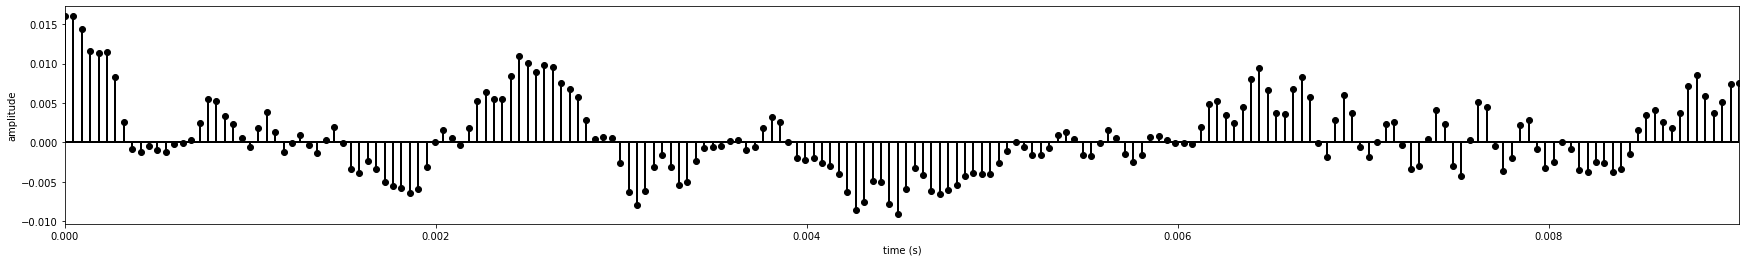

In [182]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

t_inicial = 38400
t_final   = 38600
tiempo    = np.arange(len(x[t_inicial:t_final]))/float(sr)

plt.figure(figsize=(30, 4))
#plt.plot(times, x[t_inicial:t_final], color='k') 

baseline = plt.stem(times, x[t_inicial:t_final],'r',markerfmt='ro') 
#baseline = plt.stem(n, np.real(x2),'r',markerfmt='ro')
plt.setp(baseline, color='k', linewidth=2)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')

In [166]:
print(x[0:500])

[-3.03641777e-04 -1.66879454e-05  1.63765108e-05 -1.58675939e-05
  1.51759641e-05 -1.43214247e-05  1.33280028e-05 -1.22229803e-05
  1.10358042e-05 -9.79695596e-06  8.53681377e-06 -7.28456826e-06
  6.06724097e-06 -4.90885122e-06  3.82975122e-06 -2.84616408e-06
  1.96992210e-06 -1.20841696e-06  5.64736411e-07 -3.79751839e-08
 -3.76313437e-07  6.85557495e-07 -8.99535792e-07  1.02971364e-06
 -1.08858137e-06  1.08902680e-06 -1.04377034e-06  9.64881337e-07
 -8.63391335e-07  7.49011008e-07 -6.29950136e-07  5.12836493e-07
 -4.02723344e-07  3.03170992e-07 -2.16387264e-07  1.43409125e-07
 -8.43094057e-08  3.84121357e-08 -4.50354332e-09 -1.89726688e-08
  3.37438344e-08 -4.15658832e-08  4.41123724e-08 -4.28950742e-08
  3.92140116e-08 -3.41334925e-08  2.84795849e-08 -2.28540902e-08
  1.76599748e-08 -1.31336275e-08  9.37982580e-09 -6.40619247e-09
  4.15465573e-09 -2.52836019e-09  1.41319423e-09 -6.93775759e-10
  2.64228722e-10 -3.44334630e-11 -6.73679168e-11  9.46645332e-11
 -8.45571183e-11  6.06269

In [141]:
x.shape

(110080,)